In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [59]:
img1 = cv.imread("Photo\img3.jpg", cv.IMREAD_GRAYSCALE) # queryImage
print(img1.shape)
img2 = cv.rotate(img1[150:300, 250:500], cv.ROTATE_90_CLOCKWISE)

(339, 509)


In [62]:
def pca_sift(img1, img2):
    sift = cv.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    des = np.vstack((des1, des2))
    pca = PCA(n_components=32)
    
    pca_des = pca.fit_transform(des)
    
    return len(des1), kp1, kp2, pca_des

In [66]:
def bf(img1, img2):
    n, kp1, kp2, pca_des = pca_sift(img1, img2)
    bf = cv.BFMatcher(cv.NORM_L1, crossCheck=True)
    matches = bf.match(pca_des[:n], pca_des[n:])

    matches = sorted(matches, key=lambda x: x.distance)
    img = cv.drawMatches(img1, kp1, img2, kp2, matches[:10], img2, flags=2)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return img

In [63]:
def my_matcher(img1, img2):
    n, kp1, kp2, pca_des = pca_sift(img1, img2)
    matches = []
    for i, d1 in enumerate(pca_des[:n]):
        distances = np.linalg.norm(d1-pca_des[n:], axis=1)
        min_idx = np.argmin(distances)
        min_dist = distances[min_idx]
        if min_dist < 0.8:
            matches.append(cv.DMatch(i, min_idx, min_dist))
    img = cv.drawMatches(img1, kp1, img2, kp2, matches[:10], img2, flags=2)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return img

In [64]:
def show_image(img):
    plt.figure(figsize=(15, 15))
    plt.imshow(img)
    plt.show()

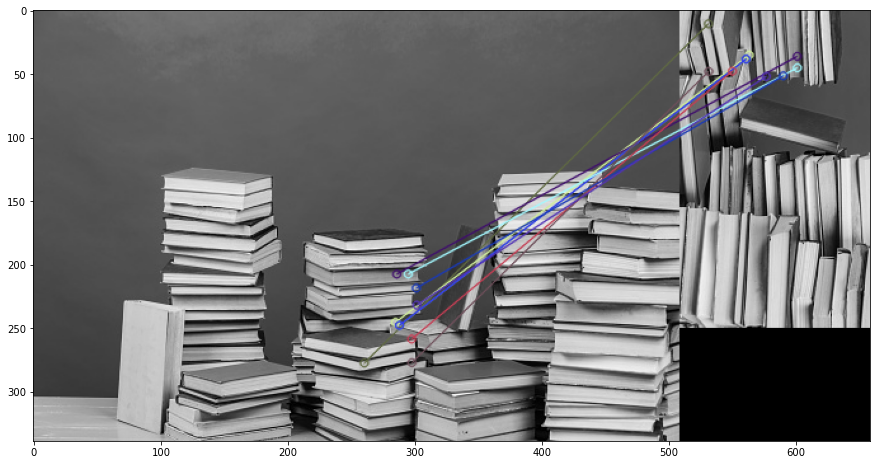

In [67]:
bf_match = bf(img1, img2)
show_image(bf_match)

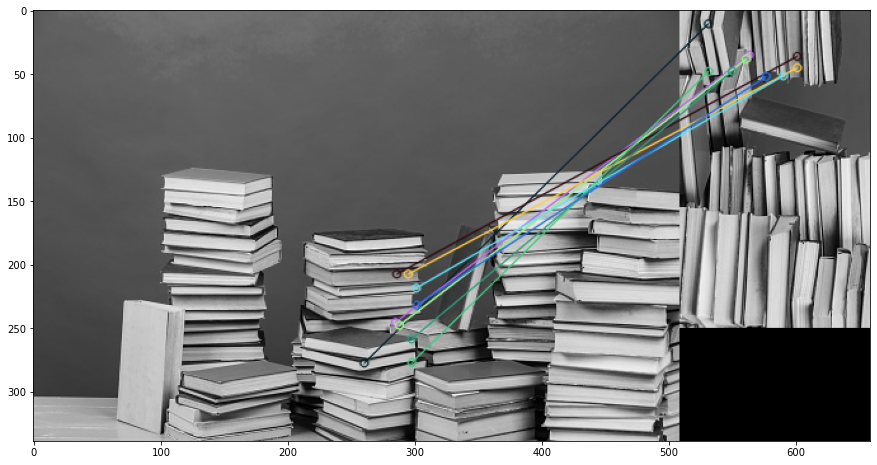

In [68]:
match = my_matcher(img1, img2)
show_image(match)

In [69]:
img1 = cv.imread("Photo\img4.jpg", cv.IMREAD_GRAYSCALE) # queryImage
img2 = cv.rotate(img1[50:250, 200:400], cv.ROTATE_90_CLOCKWISE)


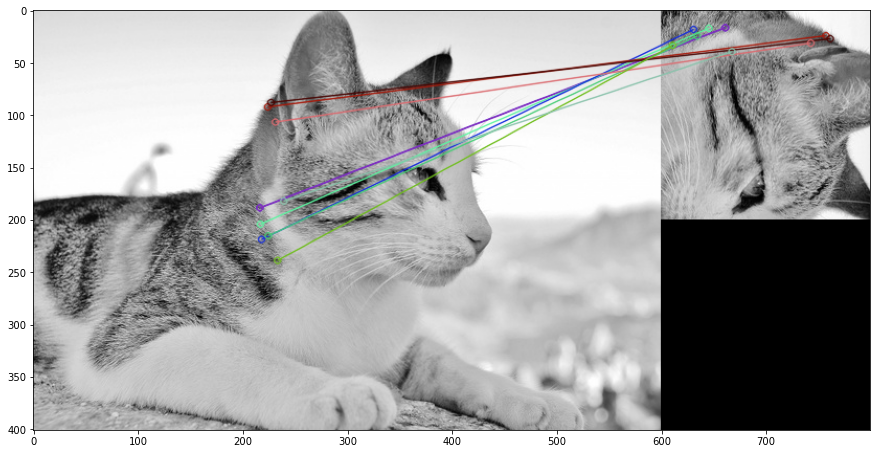

In [70]:
bf_match = bf(img1, img2)
show_image(bf_match)

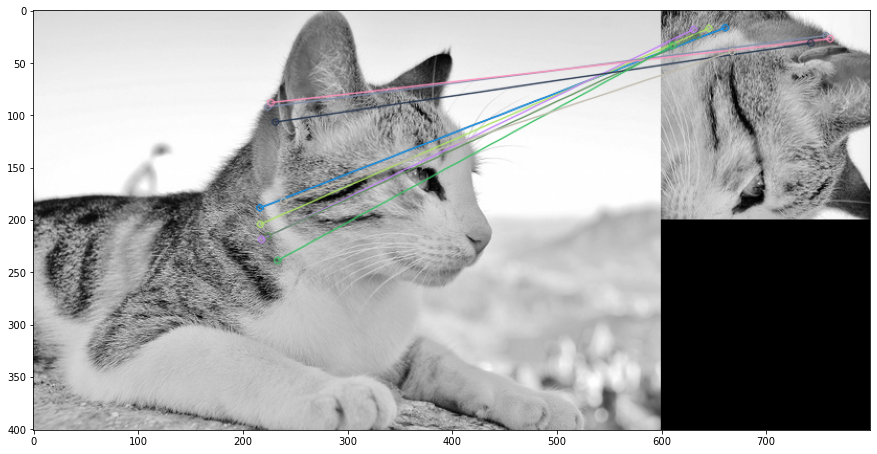

In [71]:
match = my_matcher(img1, img2)
show_image(match)